# 1.Data Inspection

In [1]:
# basic libraries to work on the dataframe
import pandas as pd
import numpy as np
# data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# libraries
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

#Increasing the columns views limit
pd.options.display.max_columns = None
pd.options.display.max_rows = 150
pd.options.display.float_format = '{:.2f}'.format

C:\Users\vjd31\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Reading the data
lead_score = pd.read_csv('Leads.csv')

In [3]:
# Inspecting first 5 rows
lead_score.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0         0.00   
1  Organic Search           No          No          0         5.00   
2  Direct Traffic           No          No          1         2.00   
3  Direct Traffic           No          No          0         1.00   
4          Google           No          No          1         2.00   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                  0.00  Page Visited on Website   
1                          674                  2.50             Email Opened   
2                         1532                  2.00             Email Opened   
3                          305                  1.00              Unreachable   
4                         1428                  1.00        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [4]:
# Checking the shape of dataset
lead_score.shape

(9240, 37)

#### Observation - The dataset contains 9240 rows and 37 columns.

In [5]:
# Checking the column names
lead_score.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [6]:
# Inspecting statistical parameters of numerical columns
lead_score.describe()

Lead Number  Converted  TotalVisits  Total Time Spent on Website  \
count      9240.00    9240.00      9103.00                      9240.00   
mean     617188.44       0.39         3.45                       487.70   
std       23406.00       0.49         4.85                       548.02   
min      579533.00       0.00         0.00                         0.00   
25%      596484.50       0.00         1.00                        12.00   
50%      615479.00       0.00         3.00                       248.00   
75%      637387.25       1.00         5.00                       936.00   
max      660737.00       1.00       251.00                      2272.00   

       Page Views Per Visit  Asymmetrique Activity Score  \
count               9103.00                      5022.00   
mean                   2.36                        14.31   
std                    2.16                         1.39   
min                    0.00                         7.00   
25%                    1.00                        14.00   
50%                    2.00                        14.00   
75%                    3.00                        15.00   
max                   55.00                        18.00   

       Asymmetrique Profile Score  
count                     5022.00  
mean                        16.34  
std                          1.81  
min                         11.00  
25%                         15.00  
50%                         16.00  
75%                         18.00  
max                         20.00

In [7]:
# Checking the info of dataset
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

#### Observation - From info we can observe that dataset contains null values which we need to treat for further analysis.

# 2.Data Cleaning

In [8]:
# Checking missing values in the dataset
lead_score.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
# Checking percentage of missing values in the dataset
100*(lead_score.isnull().sum()/lead_score.shape[0])

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  15.56
How did you hear about X Education              23.89
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

#### Observation - We can observe , some columns have more than 30% missing values. Let's drop those columns as they can affect                                     our result.

In [10]:
# Dropping columns having more than 30% misiing values
for i in lead_score.columns:
    if lead_score[i].isnull().sum()>3000:
        lead_score.drop(i,1,inplace=True)
        

In [11]:
lead_score.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

#### Observation - Columns City and Country have missing values and are not much important with respect to analysis so we can drop them.

In [12]:
# Dropping columns City and Country
lead_score.drop(['City','Country'],axis=1,inplace=True)

#### Few columns in the dataset have level as 'Select'. This might be because the student has not selected the particular level.Thus we will need to consider this 'Select value same as missing value.

In [13]:
# Get the value counts of all the columns

for column in lead_score:
    print(lead_score[column].astype('category').value_counts())
    print('___________________________________________________')

fffb0e5e-9f92-4017-9f42-781a69da4154    1
56453aec-3f7b-4f30-870c-8f966d393100    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
539eb309-df36-4a89-ac58-6d3651393910    1
5398e7ff-74db-4074-89fb-4fd9a603f521    1
53953744-234a-4cb9-9af4-bcc47eb472f4    1
539366d9-f633-455a-99e4-dbc5907db28e    1
5390c5fe-b12c-4f6e-ae92-908672abb0a1    1
5379ee79-64b7-44f8-8c56-0e1ca2d5b887    1
537963c8-22d9-459d-8aae-ddac40580ffb    1
53744d5a-0483-42c0-80b0-8990a4d2356d    1
53715ab1-2106-4c4e-8493-81cc465eb9ce    1
536cdc6b-f4c1-449d-bfd8-9ef0ac912dbb    1
53690d88-52f0-4ce5-b6b8-a13570a6db35    1
5363bd79-576c-48ed-83e4-024c81ea00c5    1
53c4e210-3344-4737-813f-74ef9a747ab6    1
53dbb914-71e7-458a-9749-cfb4d655eac2    1
53dd16bd-8201-448d-8e20-97de1cf44a7f    1
541325bd-15bb-4b52-8ad9-3fdf3cb1dd55    1
5434ccf3-9de6-4c72-8dd6-66c2829d0ee2    1
542a0891-2e52-40ba-ab42-e468b9636322    1
54238b21-65ce-4304-98c6-0f8a6b9671

#### Observation - From above we can observe that columns Lead Profile , How did you hear about X Education and Specialization have 'Select' value. 

In [14]:
# Checking value count in 'Lead Profile' column
lead_score['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [15]:
# Checking value count in 'How did you hear about X Education' column
lead_score['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [16]:
# Checking value count in 'Specialization' column
lead_score['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

#### Observation - Lead Profile and How did you hear about X Education have a lot of rows which have the value Select which is of no use to the analysis so it's best that we drop them.

In [17]:
lead_score.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

When we got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. These include `Do Not Call`, `Search`, `Magazine`, `Newspaper Article`, `X Education Forums`, `Newspaper`, `Digital Advertisement`, `Through Recommendations`, `Receive More Updates About Our Courses`, `Update me on Supply Chain Content`, `Get updates on DM Content`, `I agree to pay the amount through cheque`. Since practically all of the values for these variables are `No`, it's best that we drop these columns as they won't help with our analysis.

In [18]:
lead_score.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

The variable `What matters most to you in choosing a course` has the level `Better Career Prospects` `6528` times while the other two levels appear once twice and once respectively. So we can drop this column.

In [19]:
lead_score['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [20]:
lead_score.drop('What matters most to you in choosing a course',axis = 1,inplace=True)

In [21]:
# Checking the null values again
lead_score.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

#### Observation - We can observe 'What is your current occupation' column contains high number of null values but this column might be useful for further analysis thus we will just drop rows with null values.

In [22]:
#dropping the null values in 'What is your current occupation' column
lead_score.dropna(subset=['What is your current occupation'],inplace=True)

In [23]:
#checking the null values again
lead_score.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [24]:
#dropping the null values in 'TotalVisits' column
lead_score.dropna(subset=['TotalVisits'],inplace=True)

In [25]:
#checking the null values again
lead_score.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                               29
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [26]:
#dropping the null values in 'Lead Source' column
lead_score.dropna(subset=['Lead Source'],inplace=True)

In [27]:
#checking the null values again
lead_score.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [28]:
#dropping the null values in 'Specialization' column
lead_score.dropna(subset=['Specialization'],inplace=True)

In [29]:
#checking the null values again
lead_score.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [30]:
# checking the shape of dataset again
lead_score.shape

(6373, 14)

#### Observation - From above we can say that we have retained almost 70% of rows which is good enough for analysis.

In [31]:
# Checking the dataset again
lead_score.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email  Converted  TotalVisits  \
0      Olark Chat           No          0         0.00   
1  Organic Search           No          0         5.00   
2  Direct Traffic           No          1         2.00   
3  Direct Traffic           No          0         1.00   
4          Google           No          1         2.00   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                  0.00  Page Visited on Website   
1                          674                  2.50             Email Opened   
2                         1532                  2.00             Email Opened   
3                          305                  1.00              Unreachable   
4                         1428                  1.00        Converted to Lead   

            Specialization What is your current occupation  \
0                   Select                      Unemployed   
1                   Select                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4                   Select                      Unemployed   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

#### Observation - Prospect ID and Lead Number columns can be dropped as they are unique numbers and not useful for analysis

In [32]:
# Dropping Prospect ID column
lead_score.drop('Prospect ID',axis = 1,inplace=True)

In [33]:
# Dropping Lead Number column
lead_score.drop('Lead Number',axis = 1,inplace=True)

In [34]:
lead_score.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0         0.00                            0                  0.00   
1         5.00                          674                  2.50   
2         2.00                         1532                  2.00   
3         1.00                          305                  1.00   
4         2.00                         1428                  1.00   

             Last Activity           Specialization  \
0  Page Visited on Website                   Select   
1             Email Opened                   Select   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Select   

  What is your current occupation A free copy of Mastering The Interview  \
0                      Unemployed                                     No   
1                      Unemployed                                     No   
2                         Student                                    Yes   
3                      Unemployed                                     No   
4                      Unemployed                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

# 3.Exploratory Data Analysis

### 3.1 Univariate Analysis

In [35]:
# Univariate analysis of categorical variables
cat_vars = lead_score[['Lead Origin','Lead Source','Do Not Email','Last Activity','Specialization','What is your current occupation','A free copy of Mastering The Interview','Last Notable Activity']]

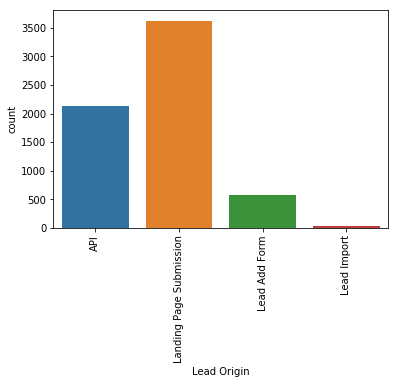

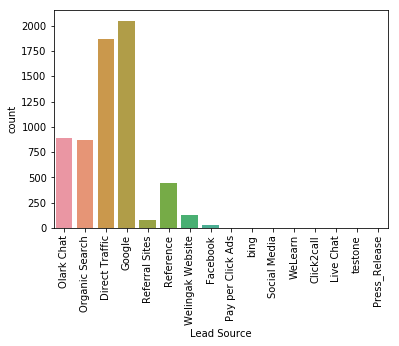

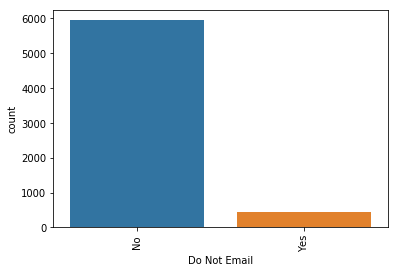

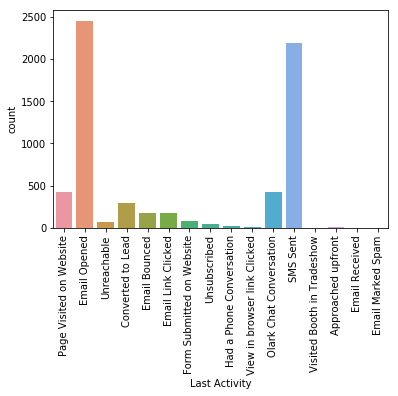

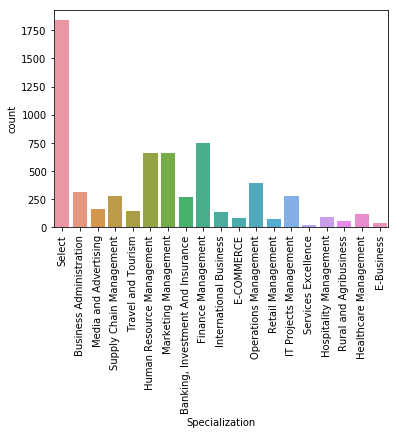

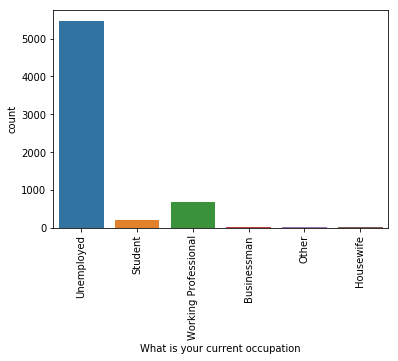

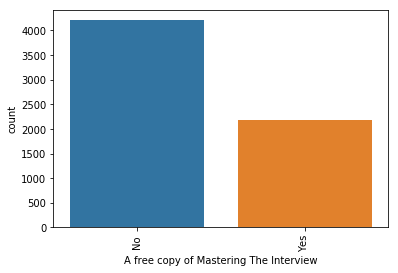

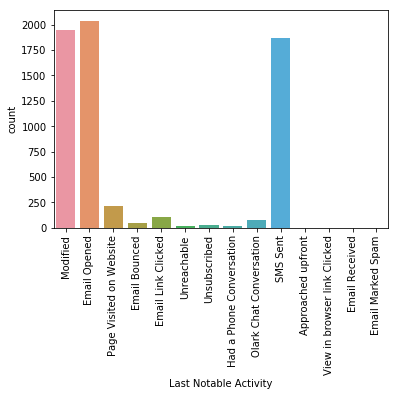

In [36]:
for i in cat_vars:
    sns.countplot(cat_vars[i])
    plt.xticks(rotation=90)
    plt.show()

***1) Landing page submission has the highest Lead origin while Google is the chief lead source followed by direct traffic.***

***2) Most of the students have said No to the Email.***

***3) Emails and SMS have been sent to many students but very less have appeared upfront or visited the booth.***

***4) Majority of the students are unemployed.***

***5) Large students are from management background of Finance,HR,Marketing.***

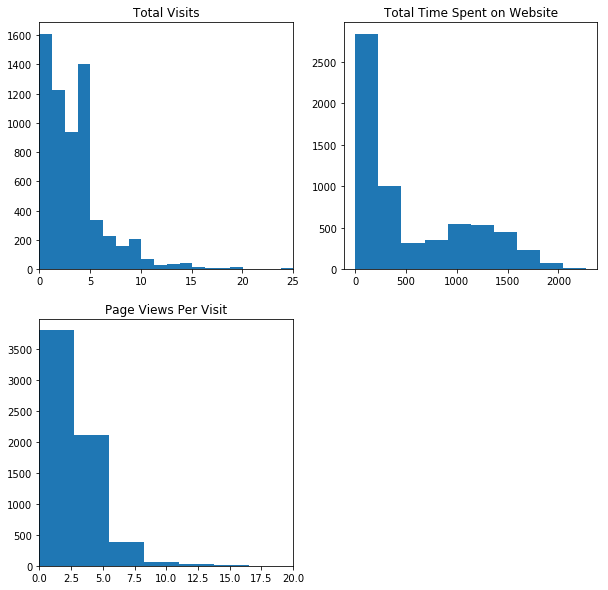

In [37]:
# Univariate analysis of numerical variables
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(lead_score['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(lead_score['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(lead_score['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

***1) Majority of the people have visited the website in 0 to 5 times.***

***2) Majority time spend on website is in 0-250 mins.***

***3) Large number of people have checked 0-5 pages in a visit to website.***

### 3.2 Bivariate Analysis 

***Here converted refers to whether a lead has been successfully converted or not.***

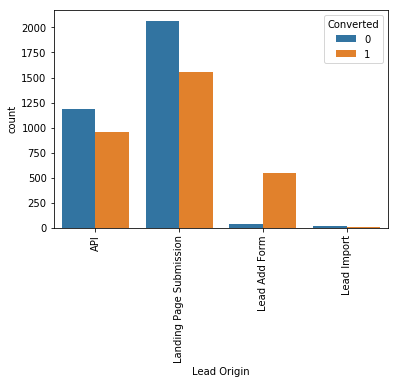

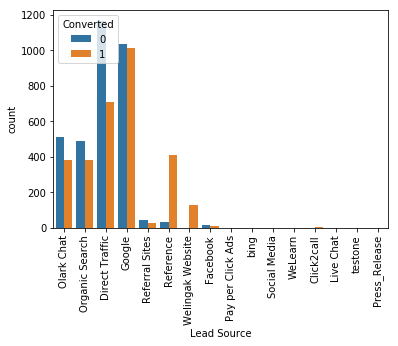

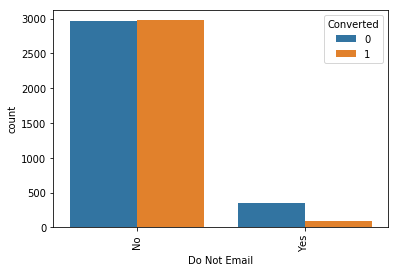

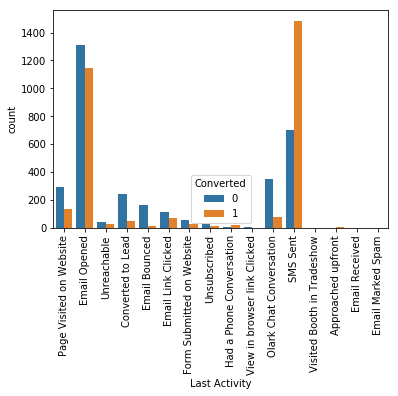

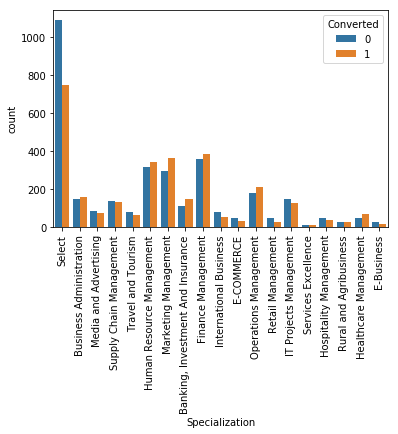

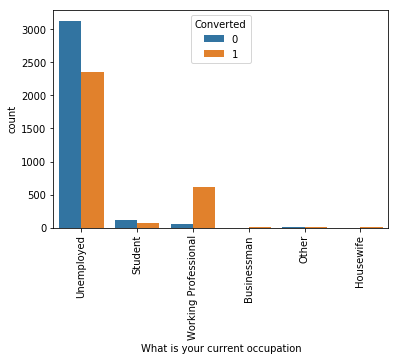

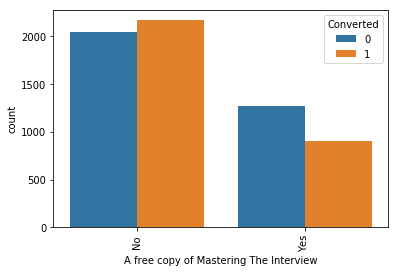

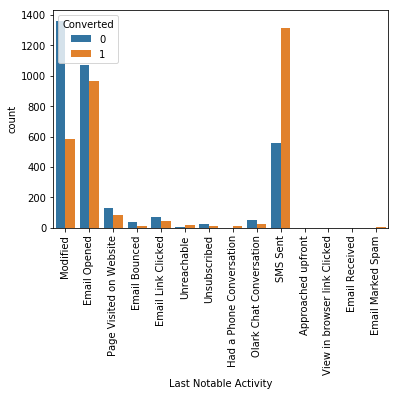

In [38]:
# Analysing variables with target variable 'Converted'
for i in cat_vars:
    sns.countplot(x=cat_vars[i], hue='Converted', data= lead_score)
    plt.xticks(rotation=90)
    plt.show()

***Upon carrying out Bivariate analysis the following observations were made***

***1)Lead origin Vs converted shows Landing page submissions and API's led to the most most leads being converted.***

***2 Lead sources which show from where a prospective student was picked up shows Google, Direct traffic and References as popular leads.***

***3)The Do Not Email column shows that most prospective leads preferred to be emailed.***

***4)Last Activity/ Last Notable Activity which shows how the prospective student engaged previously, shows they either opened emails and sms sent. ***

***5)Specialization column reveals that the prospective student who took up an interest in the courses offered were mostly from Finance management and Marketting management.***

***6) Occupation columns showed that mostly unemployed people showed interest for the course.***

***7) a free copy of Mastering The Interview column showed that prospective student showed an interest against a free copy of Mastering The Interview booklet.***

### 3.3 Correlation Check through Heatmap

***A Heat Map indicate how a varible is correlated or affects with another variable.***

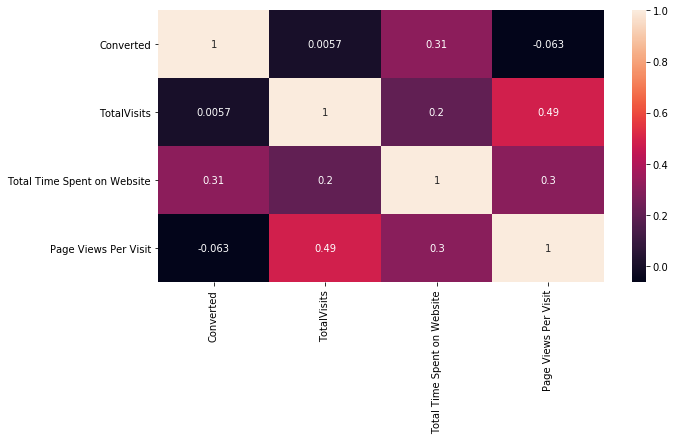

In [39]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(lead_score.corr(),annot=True)
plt.show()

***High correlation between variables seem to be absent.***

In [40]:
# Checking the outliers
num_vars = lead_score[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
num_vars.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count      6373.00                      6373.00               6373.00
mean          3.62                       535.22                  2.48
std           5.05                       565.37                  2.17
min           0.00                         0.00                  0.00
25%           1.00                        34.00                  1.00
50%           3.00                       287.00                  2.00
75%           5.00                      1022.00                  3.50
90%           8.00                      1428.80                  5.00
99%          18.00                      1849.28                  9.00
max         251.00                      2272.00                 55.00

***Observation - We can observe that there aren't any major outliers. Thus, we can move on towards further analysis.***

# 4.Dummy Variable Creation

***In this step we will deal with categorical variables. We will create dummy variables from them for further analysis.***

In [41]:
lead_score.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0         0.00                            0                  0.00   
1         5.00                          674                  2.50   
2         2.00                         1532                  2.00   
3         1.00                          305                  1.00   
4         2.00                         1428                  1.00   

             Last Activity           Specialization  \
0  Page Visited on Website                   Select   
1             Email Opened                   Select   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Select   

  What is your current occupation A free copy of Mastering The Interview  \
0                      Unemployed                                     No   
1                      Unemployed                                     No   
2                         Student                                    Yes   
3                      Unemployed                                     No   
4                      Unemployed                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

In [42]:
# Checking columns with 'object' type
obj = lead_score.loc[:, lead_score.dtypes == 'object']
obj.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [43]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(lead_score[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
lead_score = pd.concat([lead_score, dummy], axis=1)

In [44]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' which is useless so we
# drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(lead_score['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], 1)
lead_score = pd.concat([lead_score, dummy_spl], axis = 1)

In [45]:
# Dropping the variables for which the dummy variables have been created

lead_score = lead_score.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'Specialization', 'What is your current occupation',
                              'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [46]:
# Checking the dataset again
lead_score.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0         0.00                            0                  0.00   
1          0         5.00                          674                  2.50   
2          1         2.00                         1532                  2.00   
3          0         1.00                          305                  1.00   
4          1         2.00                         1428                  1.00   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Live Chat  Lead Source_Olark Chat  \
0                   0                      0                       1   
1                   0                      0                       0   
2                   0                      0                       0   
3                   0                      0                       0   
4                   1                      0                       0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead Source_Press_Release  Lead Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         0                    0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_testone  \
0                             0                 0                    0   
1                             0                 0                    0   
2                             0                 0                    0   
3                             0                 0                    0   
4                             0                 0                    0   

   Do Not Email_Yes  Last Activity_Converted to Lead  \
0                 0                                0   
1                 0                                0   
2                 0                                0   
3                 0                                0   
4                 0                                1   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2         

# 5.Splitting the dataset into Test and Training set.

In [47]:
X = lead_score.drop(['Converted'], 1)
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0         0.00                            0                  0.00   
1         5.00                          674                  2.50   
2         2.00                         1532                  2.00   
3         1.00                          305                  1.00   
4         2.00                         1428                  1.00   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Live Chat  Lead Source_Olark Chat  \
0                   0                      0                       1   
1                   0                      0                       0   
2                   0                      0                       0   
3                   0                      0                       0   
4                   1                      0                       0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead Source_Press_Release  Lead Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         0                    0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_testone  \
0                             0                 0                    0   
1                             0                 0                    0   
2                             0                 0                    0   
3                             0                 0                    0   
4                             0                 0                    0   

   Do Not Email_Yes  Last Activity_Converted to Lead  \
0                 0                                0   
1                 0                                0   
2                 0                                0   
3                 0                                0   
4                 0                                1   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3       

In [48]:
y = lead_score['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

***Splitting Dataset into 70% train and 30% test.***

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

***Using scaling we wish to bring the values in numerical columns into the same scale.***

In [50]:
scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
8003         0.02                         0.03                  0.12   
218          0.02                         0.08                  0.25   
4171         0.02                         0.03                  0.38   
4037         0.00                         0.00                  0.00   
3660         0.00                         0.00                  0.00   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
8003                                    1                          0   
218                                     1                          0   
4171                                    1                          0   
4037                                    0                          0   
3660                                    0                          1   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
8003                        0                           1   
218                         0                           1   
4171                        0                           1   
4037                        0                           0   
3660                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  \
8003                     0                   0                      0   
218                      0                   0                      0   
4171                     0                   0                      0   
4037                     0                   0                      0   
3660                     0                   0                      0   

      Lead Source_Olark Chat  Lead Source_Organic Search  \
8003                       0                           0   
218                        0                           0   
4171                       0                           0   
4037                       1                           0   
3660                       0                           0   

      Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
8003                              0                          0   
218                               0                          0   
4171                              0                          0   
4037                              0                          0   
3660                              0                          0   

      Lead Source_Reference  Lead Source_Referral Sites  \
8003                      0                           0   
218                       0                           0   
4171                      0                           0   
4037                      0                           0   
3660                      1                           0   

      Lead Source_Social Media  Lead Source_WeLearn  \
8003                         0                    0   
218                          0                    0   
4171                         0                    0   
4037                         0                    0   
3660                         0                    0   

      Lead Source_Welingak Website  Lead Source_bing  Lead Source_testone  \
8003                             0                 0                    0   
218                              0                 0                    0   
4171                             0                 0                    0   
4037                             0                 0                    0   
3660                             0                 0                    0   

      Do Not Email_Yes  Last Activity_Converted to Lead  \
8003                 0                                0   
218                  0                                0   
4171                 0                                0   
4037                 0                                0   
3660                 0                                0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
8

***Now we wish to do a correlation between all the variables and see the outcome***

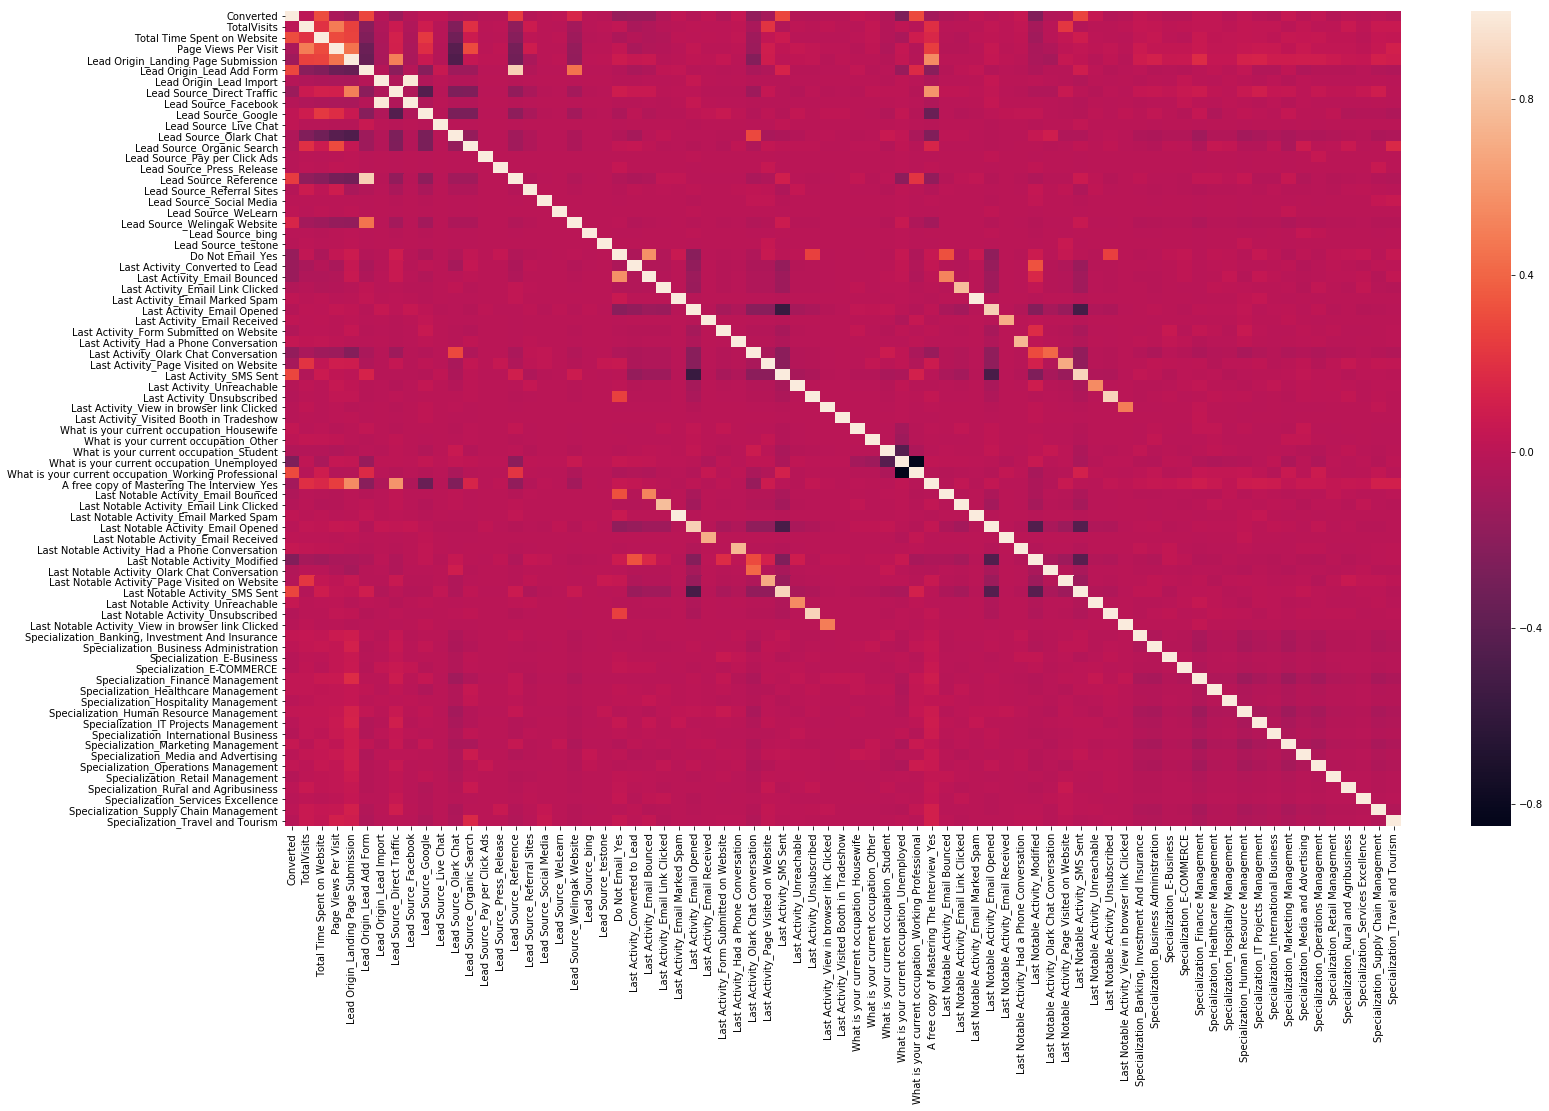

In [51]:
plt.figure(figsize = (25,15))
sns.heatmap(lead_score.corr())
plt.show()

***Due to the large number of variables present, it is impossible to carry out a meaningful evaluation from the heatmap. To select a small range of meaningful variables we use the RFE method.***

# 6.Model Building


In [52]:
logreg = LogisticRegression()

In [53]:
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [54]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 7),
 ('Lead Origin_Landing Page Submission', False, 11),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 56),
 ('Lead Source_Direct Traffic', False, 23),
 ('Lead Source_Facebook', False, 51),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Live Chat', False, 42),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Pay per Click Ads', False, 41),
 ('Lead Source_Press_Release', False, 52),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 37),
 ('Lead Source_Social Media', False, 57),
 ('Lead Source_WeLearn', False, 38),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 32),
 ('Lead Source_testone', False, 34),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 8),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link Cl

***All the columns selected by RFE is put inside a variable col***

In [55]:
col = X_train.columns[rfe.support_]

***Select only the columns selected by RFE.***



In [56]:
X_train = X_train[col]

In [57]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2072.8
Date:                Mon, 11 Jul 2022   Deviance:                       4145.5
Time:                        19:04:24   Pearson chi2:                 4.84e+03
No. Iterations:                    22                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0061      0.600     -1.677      0.094      -2.182       0.170
TotalVisits                                             11.3439      2.682      4.230      0.000       6.088      16.600
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                2.9483      1.191      2.475      0.013       0.614       5.283
Lead Source_Olark Chat                                   1.4584      0.122     11.962      0.000       1.219       1.697
Lead Source_Reference                                    1.2994      1.214      1.070      0.285      -1.080       3.679
Lead Source_Welingak Website                             3.4159      1.558      2.192      0.028       0.362       6.470
Do Not Email_Yes                                        -1.5053      0.193     -7.781      0.000      -1.884      -1.126
Last Activity_Had a Phone Conversation                   1.0397      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6492   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1544      0.630     -1.831      0.067      -2.390       0.081
What is your current occupation_Unemployed              -1.3395      0.594     -2.254      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1932   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7868      0.807      3.453      0.001       1.205       4.369
========================================================================================================================
"""

***A few variables have a p-value greater than 0.05. before tackling them let's also look at the VIFs.***

In [58]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                           Lead Origin_Lead Add Form 84.19
4                               Lead Source_Reference 65.18
5                        Lead Source_Welingak Website 20.03
11         What is your current occupation_Unemployed  3.65
7              Last Activity_Had a Phone Conversation  2.44
13     Last Notable Activity_Had a Phone Conversation  2.43
1                         Total Time Spent on Website  2.38
0                                         TotalVisits  1.62
8                              Last Activity_SMS Sent  1.59
12  What is your current occupation_Working Profes...  1.56
3                              Lead Source_Olark Chat  1.44
6                                    Do Not Email_Yes  1.09
10            What is your current occupation_Student  1.09
9           What is your current occupation_Housewife  1.01
14                  Last Notable Activity_Unreachable  1.01

***Lead Origin_Lead Add Form has a high VIF of	84.19, Lead Source_Reference has a VIF of 65.18 and Lead Source_Welingak Website has a VIF of 20.03. Firstly Lead Source_Reference is removed and its effect studied.***

In [59]:
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

In [60]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2073.2
Date:                Mon, 11 Jul 2022   Deviance:                       4146.5
Time:                        19:04:25   Pearson chi2:                 4.82e+03
No. Iterations:                    22                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0057      0.600     -1.677      0.094      -2.181       0.170
TotalVisits                                             11.3428      2.682      4.229      0.000       6.086      16.599
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                4.2084      0.259     16.277      0.000       3.702       4.715
Lead Source_Olark Chat                                   1.4583      0.122     11.960      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5036      0.193     -7.779      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   1.0398      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6511   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1537      0.630     -1.830      0.067      -2.389       0.082
What is your current occupation_Unemployed              -1.3401      0.594     -2.255      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2748      0.623      2.046      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1934   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7872      0.807      3.454      0.001       1.205       4.369
========================================================================================================================
"""

In [61]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features  VIF
10         What is your current occupation_Unemployed 3.65
6              Last Activity_Had a Phone Conversation 2.44
12     Last Notable Activity_Had a Phone Conversation 2.43
1                         Total Time Spent on Website 2.38
2                           Lead Origin_Lead Add Form 1.71
0                                         TotalVisits 1.62
7                              Last Activity_SMS Sent 1.59
11  What is your current occupation_Working Profes... 1.56
3                              Lead Source_Olark Chat 1.44
4                        Lead Source_Welingak Website 1.33
5                                    Do Not Email_Yes 1.09
9             What is your current occupation_Student 1.09
8           What is your current occupation_Housewife 1.01
13                  Last Notable Activity_Unreachable 1.01

***The VIFs are now all less than 5. So let's drop the ones with the high p-values beginning with Last Notable Activity_Had a Phone Conversation.***

In [62]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

***Refitting the model.***

In [63]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2076.1
Date:                Mon, 11 Jul 2022   Deviance:                       4152.2
Time:                        19:04:25   Pearson chi2:                 4.82e+03
No. Iterations:                    21                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0069      0.600     -1.679      0.093      -2.182       0.168
TotalVisits                                             11.4551      2.686      4.265      0.000       6.191      16.720
Total Time Spent on Website                              4.4237      0.185     23.900      0.000       4.061       4.787
Lead Origin_Lead Add Form                                4.2082      0.259     16.276      0.000       3.701       4.715
Lead Source_Olark Chat                                   1.4581      0.122     11.958      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5037      0.193     -7.780      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   2.7502      0.802      3.430      0.001       1.179       4.322
Last Activity_SMS Sent                                   1.1826      0.082     14.364      0.000       1.021       1.344
What is your current occupation_Housewife               21.6525   1.49e+04      0.001      0.999   -2.91e+04    2.91e+04
What is your current occupation_Student                 -1.1520      0.630     -1.828      0.068      -2.387       0.083
What is your current occupation_Unemployed              -1.3385      0.594     -2.253      0.024      -2.503      -0.174
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.495
Last Notable Activity_Unreachable                        2.7862      0.807      3.453      0.001       1.205       4.368
========================================================================================================================
"""

***What is your current occupation_Housewife is dropped***

In [64]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)


In [65]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2078.3
Date:                Mon, 11 Jul 2022   Deviance:                       4156.7
Time:                        19:04:25   Pearson chi2:                 4.83e+03
No. Iterations:                     7                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4528      0.554     -0.818      0.413      -1.538       0.632
TotalVisits                                             11.2586      2.672      4.214      0.000       6.023      16.495
Total Time Spent on Website                              4.4217      0.185     23.898      0.000       4.059       4.784
Lead Origin_Lead Add Form                                4.2057      0.258     16.274      0.000       3.699       4.712
Lead Source_Olark Chat                                   1.4530      0.122     11.930      0.000       1.214       1.692
Lead Source_Welingak Website                             2.1541      1.037      2.078      0.038       0.122       4.186
Do Not Email_Yes                                        -1.5063      0.193     -7.785      0.000      -1.886      -1.127
Last Activity_Had a Phone Conversation                   2.7515      0.802      3.432      0.001       1.180       4.323
Last Activity_SMS Sent                                   1.1823      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Student                 -1.7017      0.588     -2.893      0.004      -2.855      -0.549
What is your current occupation_Unemployed              -1.8879      0.550     -3.435      0.001      -2.965      -0.811
What is your current occupation_Working Professional     0.7246      0.581      1.248      0.212      -0.413       1.862
Last Notable Activity_Unreachable                        2.7834      0.807      3.448      0.001       1.201       4.365
========================================================================================================================
"""

***What is your current occupation_Working Professional is dropped***

In [66]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)


***Refitting the model***

In [67]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2079.1
Date:                Mon, 11 Jul 2022   Deviance:                       4158.1
Time:                        19:04:25   Pearson chi2:                 4.80e+03
No. Iterations:                     7                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2040      0.196      1.043      0.297      -0.179       0.587
TotalVisits                                   11.1489      2.665      4.184      0.000       5.926      16.371
Total Time Spent on Website                    4.4223      0.185     23.899      0.000       4.060       4.785
Lead Origin_Lead Add Form                      4.2051      0.258     16.275      0.000       3.699       4.712
Lead Source_Olark Chat                         1.4526      0.122     11.934      0.000       1.214       1.691
Lead Source_Welingak Website                   2.1526      1.037      2.076      0.038       0.121       4.185
Do Not Email_Yes                              -1.5037      0.193     -7.774      0.000      -1.883      -1.125
Last Activity_Had a Phone Conversation         2.7552      0.802      3.438      0.001       1.184       4.326
Last Activity_SMS Sent                         1.1856      0.082     14.421      0.000       1.024       1.347
What is your current occupation_Student       -2.3578      0.281     -8.392      0.000      -2.908      -1.807
What is your current occupation_Unemployed    -2.5445      0.186    -13.699      0.000      -2.908      -2.180
Last Notable Activity_Unreachable              2.7846      0.807      3.449      0.001       1.202       4.367
==============================================================================================================
"""

***p values are appropriate, accordingly VIF values are rechecked.***

In [68]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features  VIF
9   What is your current occupation_Unemployed 2.82
1                  Total Time Spent on Website 2.00
0                                  TotalVisits 1.54
7                       Last Activity_SMS Sent 1.51
2                    Lead Origin_Lead Add Form 1.45
3                       Lead Source_Olark Chat 1.33
4                 Lead Source_Welingak Website 1.30
5                             Do Not Email_Yes 1.08
8      What is your current occupation_Student 1.06
6       Last Activity_Had a Phone Conversation 1.01
10           Last Notable Activity_Unreachable 1.01

***Since VIF values and P values are of acceptable range model evaluation is carried out.*** 

# 7.Model evaluation

In [69]:
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

8003   0.30
218    0.14
4171   0.13
4037   0.29
3660   0.95
207    0.19
2044   0.18
6411   0.95
6498   0.08
2085   0.98
dtype: float64

***Reshaping into an array.***

In [70]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([ 0.30011695,  0.14200165,  0.12762885,  0.29155814,  0.95479546,
        0.19442563,  0.17807328,  0.94946006,  0.07599465,  0.98231619])

***Creating a dataframe with the actual conversion flag and the predicted probabilities.***


In [71]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

Conversion_Prob  Converted
0             0.30          0
1             0.14          0
2             0.13          1
3             0.29          1
4             0.95          1

***A new column 'Predicted' is created with 1 if Paid_Prob > 0.5 else 0.***

In [72]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Conversion_Prob  Converted  Predicted
0             0.30          0          0
1             0.14          0          0
2             0.13          1          0
3             0.29          1          0
4             0.95          1          1

***Create confusion matrix***

In [73]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1929  383]
 [ 560 1589]]


***Checking accuracy***

In [74]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.78861241874


In [75]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [76]:
# Calculate the sensitivity

TP/(TP+FN)

0.73941368078175895

In [77]:
# Calculate the specificity
TN/(TN+FP)

0.83434256055363321

***Finding Optimal cutoff***

In [78]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [79]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )


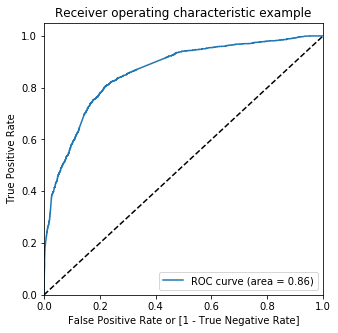

In [80]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

***The area under the curve of the ROC is 0.86 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.***

In [81]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Conversion_Prob  Converted  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0             0.30          0          0    1    1    1    1    0    0    0   
1             0.14          0          0    1    1    0    0    0    0    0   
2             0.13          1          0    1    1    0    0    0    0    0   
3             0.29          1          0    1    1    1    0    0    0    0   
4             0.95          1          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    1    1    1

In [82]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.48   1.00   0.00
0.10  0.10      0.53   0.99   0.09
0.20  0.20      0.70   0.94   0.47
0.30  0.30      0.77   0.87   0.68
0.40  0.40      0.79   0.81   0.77
0.50  0.50      0.79   0.74   0.83
0.60  0.60      0.76   0.62   0.88
0.70  0.70      0.74   0.54   0.91
0.80  0.80      0.71   0.45   0.95
0.90  0.90      0.64   0.28   0.98


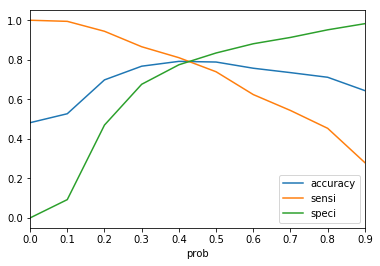

In [83]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

***Around 0.42, you get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now.***

In [84]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

Conversion_Prob  Converted  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0             0.30          0          0    1    1    1    1    0    0    0   
1             0.14          0          0    1    1    0    0    0    0    0   
2             0.13          1          0    1    1    0    0    0    0    0   
3             0.29          1          0    1    1    1    0    0    0    0   
4             0.95          1          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    1    1    1                1

***Accuracy check is carried out***

In [85]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)


0.79085406859448559

In [86]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1823,  489],
       [ 444, 1705]], dtype=int64)

In [87]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [88]:
TP/(TP+FN)

0.793392275476966

In [89]:
TN/(TN+FP)

0.78849480968858132

***This value is deemed as a reasonable cutoff***

# 8.Making Predictions

In [90]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [91]:
X_test = X_test[col]
X_test.head()

TotalVisits  Total Time Spent on Website  Lead Origin_Lead Add Form  \
4771         0.00                         0.00                          1   
6122         0.03                         0.03                          0   
9202         0.02                         0.42                          0   
6570         0.01                         0.38                          0   
2668         0.03                         0.40                          0   

      Lead Source_Olark Chat  Lead Source_Reference  \
4771                       0                      1   
6122                       0                      0   
9202                       0                      0   
6570                       0                      0   
2668                       0                      0   

      Lead Source_Welingak Website  Do Not Email_Yes  \
4771                             0                 0   
6122                             0                 0   
9202                             0                 0   
6570                             0                 1   
2668                             0                 0   

      Last Activity_Had a Phone Conversation  Last Activity_SMS Sent  \
4771                                       0                       1   
6122                                       0                       0   
9202                                       0                       1   
6570                                       0                       1   
2668                                       0                       1   

      What is your current occupation_Housewife  \
4771                                          0   
6122                                          0   
9202                                          0   
6570                                          0   
2668                                          0   

      What is your current occupation_Student  \
4771                                        0   
6122                                        0   
9202                                        0   
6570                                        0   
2668                                        0   

      What is your current occupation_Unemployed  \
4771                                           0   
6122                                           1   
9202                                           1   
6570                                           1   
2668                                           1   

      What is your current occupation_Working Professional  \
4771                                                  1      
6122                                                  0      
9202                                                  0      
6570                                                  0      
2668                                                  0      

      Last Notable Activity_Had a Phone Conversation  \
4771                                               0   
6122                                               0   
9202                                               0   
6570                                               0   
2668                                               0   

      Last Notable Activity_Unreachable  
4771                                  0  
6122                                  0  
9202                                  0  
6570                                  0  
2668                                  0

In [92]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [93]:
X_test_sm

const  TotalVisits  Total Time Spent on Website  \
4771   1.00         0.00                         0.00   
6122   1.00         0.03                         0.03   
9202   1.00         0.02                         0.42   
6570   1.00         0.01                         0.38   
2668   1.00         0.03                         0.40   
4233   1.00         0.00                         0.00   
3368   1.00         0.01                         0.71   
9091   1.00         0.04                         0.41   
5972   1.00         0.01                         0.03   
3631   1.00         0.02                         0.51   
6884   1.00         0.00                         0.00   
4362   1.00         0.01                         0.10   
7718   1.00         0.02                         0.14   
3715   1.00         0.02                         0.46   
4198   1.00         0.01                         0.37   
7790   1.00         0.00                         0.18   
2424   1.00         0.02                         0.35   
1899   1.00         0.02                         0.81   
8209   1.00         0.01                         0.07   
182    1.00         0.02                         0.40   
2010   1.00         0.03                         0.38   
731    1.00         0.01                         0.15   
1872   1.00         0.00                         0.00   
8987   1.00         0.01                         0.57   
3083   1.00         0.01                         0.29   
8205   1.00         0.00                         0.00   
5370   1.00         0.01                         0.08   
7386   1.00         0.00                         0.00   
1925   1.00         0.02                         0.38   
1965   1.00         0.00                         0.00   
1552   1.00         0.01                         0.63   
8442   1.00         0.00                         0.00   
7766   1.00         0.02                         0.03   
2798   1.00         0.00                         0.00   
999    1.00         0.02                         0.81   
8114   1.00         0.02                         0.62   
3193   1.00         0.04                         0.10   
2914   1.00         0.01                         0.49   
8174   1.00         0.00                         0.00   
1991   1.00         0.04                         0.66   
8497   1.00         0.01                         0.09   
6989   1.00         0.04                         0.41   
6175   1.00         0.02                         0.83   
5710   1.00         0.01                         0.06   
9162   1.00         0.03                         0.67   
5652   1.00         0.00                         0.00   
6948   1.00         0.00                         0.03   
1311   1.00         0.01                         0.51   
5998   1.00         0.04                         0.31   
2050   1.00         0.04                         0.17   
6144   1.00         0.02                         0.40   
9142   1.00         0.01                         0.10   
8567   1.00         0.00                         0.00   
7048   1.00         0.04                         0.54   
6459   1.00         0.01                         0.11   
288    1.00         0.02                         0.01   
8864   1.00         0.01                         0.12   
3814   1.00         0.01                         0.60   
8641   1.00         0.00                         0.00   
5814   1.00         0.01                         0.10   
4551   1.00         0.02                         0.54   
1886   1.00         0.01                         0.47   
1644   1.00         0.00                         0.00   
2131   1.00         0.00                         0.00   
6942   1.00         0.00                         0.00   
6655   1.00         0.02                         0.07   
6545   1.00         0.04                         0.00   
1602   1.00         0.02                         0.00   
3579   1.00         0.02                         0.06   
889    1.00     

In [94]:
X_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife', 
             'What is your current occupation_Working Professional', 'Last Notable Activity_Had a Phone Conversation'], 1, inplace = True)


In [95]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1912 entries, 4771 to 4088
Data columns (total 11 columns):
TotalVisits                                   1912 non-null float64
Total Time Spent on Website                   1912 non-null float64
Lead Origin_Lead Add Form                     1912 non-null uint8
Lead Source_Olark Chat                        1912 non-null uint8
Lead Source_Welingak Website                  1912 non-null uint8
Do Not Email_Yes                              1912 non-null uint8
Last Activity_Had a Phone Conversation        1912 non-null uint8
Last Activity_SMS Sent                        1912 non-null uint8
What is your current occupation_Student       1912 non-null uint8
What is your current occupation_Unemployed    1912 non-null uint8
Last Notable Activity_Unreachable             1912 non-null uint8
dtypes: float64(2), uint8(9)
memory usage: 61.6 KB


In [96]:
y_test_pred = res.predict(sm.add_constant(X_test))

In [97]:
y_test_pred[:10]


4771   1.00
6122   0.13
9202   0.70
6570   0.30
2668   0.72
4233   0.79
3368   0.70
9091   0.46
5972   0.28
3631   0.79
dtype: float64

In [98]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [99]:
y_pred_1.head()

0
4771 1.00
6122 0.13
9202 0.70
6570 0.30
2668 0.72

In [100]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [101]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [102]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [103]:
# Check 'y_pred_final'

y_pred_final.head()

Converted    0
0          1 1.00
1          0 0.13
2          0 0.70
3          1 0.30
4          1 0.72

In [104]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [105]:
# Let's see the head of y_pred_final

y_pred_final.head()

Converted  Conversion_Prob
0          1             1.00
1          0             0.13
2          0             0.70
3          1             0.30
4          1             0.72

In [106]:
# Make predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)


In [107]:
# Check y_pred_final

y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0          1             1.00                1
1          0             0.13                0
2          0             0.70                1
3          1             0.30                0
4          1             0.72                1

In [108]:
#Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)


0.78451882845188281

In [109]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[786, 210],
       [202, 714]], dtype=int64)

In [110]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [111]:
# Calculate sensitivity
TP / float(TP+FN)

0.77947598253275108

In [112]:
# Calculate specificity
TN / float(TN+FP)

0.78915662650602414

# 9.Precision and Recall

In [113]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1929,  383],
       [ 560, 1589]], dtype=int64)

In [114]:
#Precision is defined as
#TP / TP + FP
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.73941368078175895

In [115]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
 5       0
 6       0
 7       1
 8       0
 9       1
 10      0
 11      0
 12      1
 13      1
 14      0
 15      1
 16      1
 17      1
 18      1
 19      1
 20      0
 21      0
 22      1
 23      0
 24      0
 25      0
 26      1
 27      0
 28      1
 29      0
 30      0
 31      0
 32      0
 33      0
 34      0
 35      1
 36      0
 37      0
 38      0
 39      1
 40      0
 41      1
 42      0
 43      0
 44      1
 45      0
 46      0
 47      1
 48      0
 49      1
 50      0
 51      0
 52      1
 53      1
 54      1
 55      0
 56      0
 57      0
 58      0
 59      0
 60      0
 61      0
 62      1
 63      0
 64      1
 65      0
 66      0
 67      0
 68      0
 69      0
 70      1
 71      1
 72      1
 73      0
 74      1
        ..
 4386    0
 4387    1
 4388    1
 4389    1
 4390    1
 4391    1
 4392    1
 4393    0
 4394    0
 4395    0
 4396    0
 4397    1
 4398    0
 4399    1
 4400    1

In [116]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

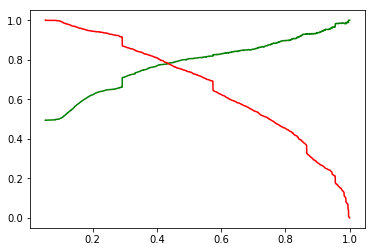

In [117]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [118]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

Conversion_Prob  Converted  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0             0.30          0          0    1    1    1    1    0    0    0   
1             0.14          0          0    1    1    0    0    0    0    0   
2             0.13          1          0    1    1    0    0    0    0    0   
3             0.29          1          0    1    1    1    0    0    0    0   
4             0.95          1          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    1    1    1                1

In [119]:
#accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.78950907868190989

In [120]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1852,  460],
       [ 479, 1670]], dtype=int64)

In [121]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [122]:
# Calculate Precision

TP/(TP+FP)

0.784037558685446

In [123]:
# Calculate Recall

TP/(TP+FN)

0.77710563052582593

***A reasonable cuttoff has been set.***

# 10.Making Predictions on the Test Set

In [124]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [125]:
y_test_pred[:10]

4771   1.00
6122   0.13
9202   0.70
6570   0.30
2668   0.72
4233   0.79
3368   0.70
9091   0.46
5972   0.28
3631   0.79
dtype: float64

In [126]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [127]:
# Let's see the head

y_pred_1.head()

0
4771 1.00
6122 0.13
9202 0.70
6570 0.30
2668 0.72

In [128]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [129]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [130]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [131]:
# Check 'y_pred_final'

y_pred_final.head()

Converted    0
0          1 1.00
1          0 0.13
2          0 0.70
3          1 0.30
4          1 0.72

In [132]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [133]:
# Let's see the head of y_pred_final

y_pred_final.head()

Converted  Conversion_Prob
0          1             1.00
1          0             0.13
2          0             0.70
3          1             0.30
4          1             0.72

In [134]:
# Make predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [135]:
# Check y_pred_final

y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0          1             1.00                1
1          0             0.13                0
2          0             0.70                1
3          1             0.30                0
4          1             0.72                1

In [136]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.78661087866108792

In [137]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[801, 195],
       [213, 703]], dtype=int64)

In [138]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


In [139]:
# Calculate Precision

TP/(TP+FP)

0.78285077951002224

In [140]:
# Calculate Recall

TP/(TP+FN)


0.76746724890829698

#### Concluding Remark - From above we can say that we have got enough accuracy in our model which will give confidence to the CEO for future conversion rates.